# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.25$ and a fixed random state = $10$.
2. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $6$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 
3. Comment on the interpretability of decision trees.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import warnings
warnings.filterwarnings("ignore")

In [17]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


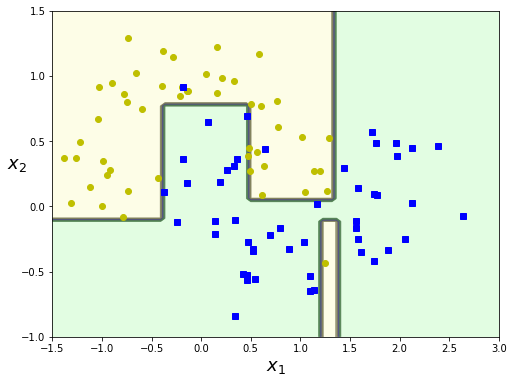

In [18]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
data = make_moons(n_samples = 100, noise = 0.25, random_state = 53)
X = data[0]
Y = data[1]
dt_clf = DecisionTreeClassifier(max_depth = 6)
dt_fit = dt_clf.fit(X,Y)
plt.figure(figsize = (8,6))
plot_decision_boundary(dt_fit, X, Y, axes = [-1.5, 3, -1, 1.5])

3) The decision trees have a good interpretability as of the linear regression and sometimes even more interpretable as it mimics the general decision making process where based on many simple conditions we divide the data in a way we dig more information related to the final decision (prediction) which seems intuitive.

### Overfitting in decision tree classifiers

1. Fit another decision tree classifier on the dataset used above, with no restrictions on the model hyperparameters. Plot the decision boundaries and comment on your observations regarding the overfitting tendency of decision tree classifiers.
2. List and explain in a line or two some of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
3. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

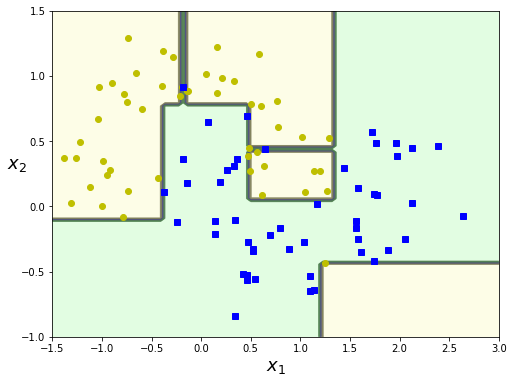

In [19]:
dt_clf2 = DecisionTreeClassifier()
dt_fit2 = dt_clf2.fit(X,Y)
plt.figure(figsize = (8,6))
plot_decision_boundary(dt_fit2, X, Y, axes = [-1.5, 3, -1, 1.5])

1) As we can see if the hyperparameters are not specified (i.e some control on how many times to split) decision tree tries to overfit the data i.e the tree continues to fit till each data point is a different leaf in the tree. 

2) In decision trees regularization is done by pruning (which actually reduces the size of decision trees by removing sections of the tree that provide little power to classify instances), fix the max depth of the tree, train more than one decision tree and use ensemble to predict (Random Forest) etc.

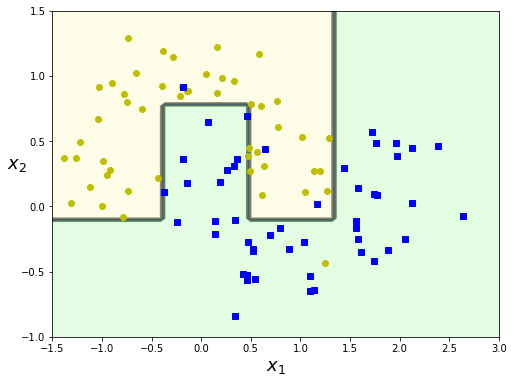

In [20]:
dt_clf3 = DecisionTreeClassifier(min_samples_leaf = 4)
dt_fit3 = dt_clf3.fit(X,Y)
plt.figure(figsize = (8,6))
plot_decision_boundary(dt_fit3, X, Y, axes = [-1.5, 3, -1, 1.5])

In my opinion, model 3 generalises well on the test dataset.

1) model-1 captures a datapoint of yellow class that means it overfit the data.

2) model-2 captures all the datapoints and is an example of high overfitting.

3) model-3 captures a decision boundary which doesn't consider the outliers and will be more robust and accurate.

### Instability of decision trees

1. Generate 100 points ($[x1, x2]$) in the 2D plane using np.random.rand() for $(-0.5)<x1<0.5$ and $(-0.5)<x2<0.5$ .  
2. Assign a label of $1$ to all points having $x1>0.0$ and $0$ otherwise. The dataset can now be easily classified using a straight line parallel to the $x2$ axis. 
3. Fit a decision tree classifier on the above obtained dataset ($D1$) and plot the decision boundary.
4. Now rotate the dataset by $45^{\circ}$in the $[x1,x2]$ plane by suitably multiplying the $100$ points by a rotation matrix.
5. Fit a decision tree classifier on the above obtained dataset ($D2$) and plot the decision boundary.
6. The two datasets obtained above are essentially rotated versions of each other. Comment on the changed decision boundaries of the fit decision trees. Although both the decision trees fit the training datset (D1 and D2) perfectly, which decision tree do you think will generalize better on the test dataset?
7. Conclude about the sensitivity of decision trees to rotation of training data and give reasons for the same.
8. Mention one technique that can result in a better orientation of the training dataset.

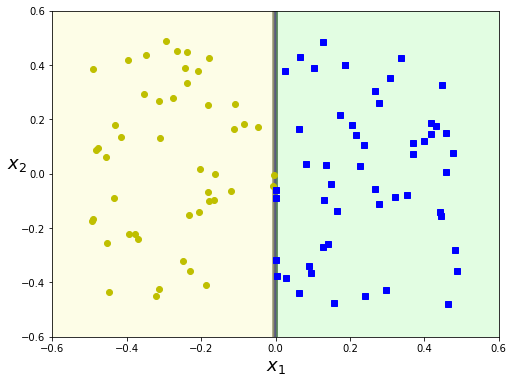

In [21]:
# (1)
# generating 100 points
import pandas as pd
X1 = np.random.rand(100, 2) - 0.5
Y1 = np.zeros((X.shape[0]))
for i in range(X.shape[0]):
    if X1[i,0] > 0:
        Y1[i] = 1
    else:
        Y1[i] = 0

dt_clf4 = DecisionTreeClassifier()
dt_fit4 = dt_clf4.fit(X1,Y1)
plt.figure(figsize = (8,6))
plot_decision_boundary(dt_fit4, X1, Y1, axes = [-0.6, 0.6, -0.6, 0.6])

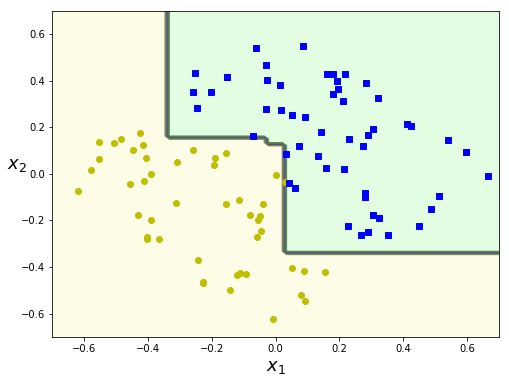

In [22]:
# rotation of the dataset by 45 deg
rot_mat = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])
rot_dat = np.dot(X1, rot_mat)

dt_clf5 = DecisionTreeClassifier()
dt_fit5 = dt_clf5.fit(rot_dat,Y1)
plt.figure(figsize = (8,6))
plot_decision_boundary(dt_fit5, rot_dat, Y1, axes = [-0.7, 0.7, -0.7, 0.7])

(6)
In the unrotated case we get a linear decision boundary where as in rotated case we get a complex decision boundary (as decision trees generate orthogonal decision boundaries and hence generates complicated decision boundary) as can be seen above. 
In my opinion, the first decision boundary(linear) will generalize better on the test dataset as in the second case the model seems to overfit the data (more complex).

(7)
Decision trees are sensitive to training data rotation which can be clearly observed from above exercise and in general Decision trees are very sensitive to a change in training dataset because the environment changes and hence the splitting criteria will easily change.

(8)
Principal Component analysis (PCA) results in better orientation of the training dataset.

### Linear classifiers vs decision tree classifiers

1. Taking into account the fact that all decision boundary splits are perpendicular to the input axes, give an example of a dataset where : <br>
a. The linear classifier outperforms the decision tree classifier <br> 
b. The decision tree classifier outperforms the linear classifier <br>
For ease of visualizing, your datasets can contain 2D points having two labels : $0$ and $1$. Plot the points such that all points having the same label are of the same colour.


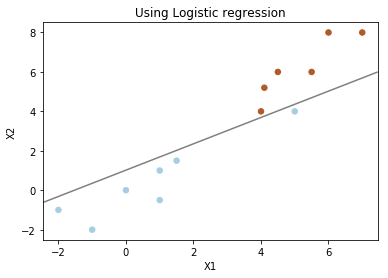

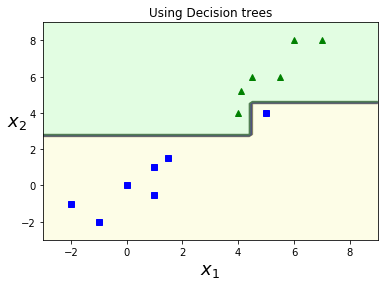

In [30]:
# part - (a)
from sklearn.linear_model import LogisticRegression
class_1 = np.array([[-1,-2,1],[1,1,1], [1.5,1.5,1], [-2,-1, 1], [0,0,1], [1, -0.5, 1], [5, 4, 1]])
class_0 = np.array([[4.1,5.2,2], [6,8,2], [4,4,2], [7,8,2], [4.5,6,2],[5.5,6,2]])

X = np.concatenate((class_1[:,:2], class_0[:,:2]))
y = np.concatenate((class_1[:,2], class_0[:,2]))
lg_cl = LogisticRegression(C = 100).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired )
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = lg_cl.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.title("Using Logistic regression")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# decision tree classifier on the same dataset
dt_clf = DecisionTreeClassifier()
dt_fit = dt_clf.fit(X,y)
plot_decision_boundary(dt_fit, X, y, axes = [-3, 9, -3, 9])
plt.title("Using Decision trees")
plt.show()

### Regression using decision trees

1. Train a regression tree on the noisy quadratic dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

Text(0, 0.5, 'y')

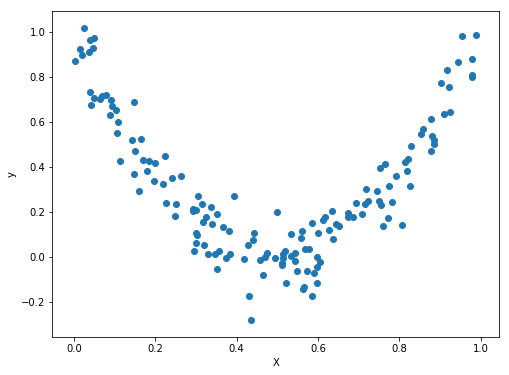

In [32]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Quadratic + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(150, 1) / 10
plt.figure(figsize = (8,6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

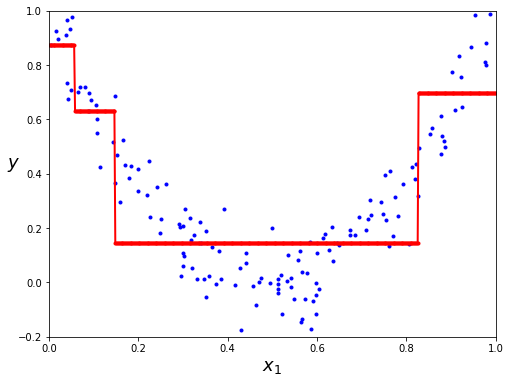

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth = 2)
dt_fit = dt_reg.fit(X, y)
plt.figure(figsize = (8,6))
plot_regression_predictions(dt_fit, X, y)

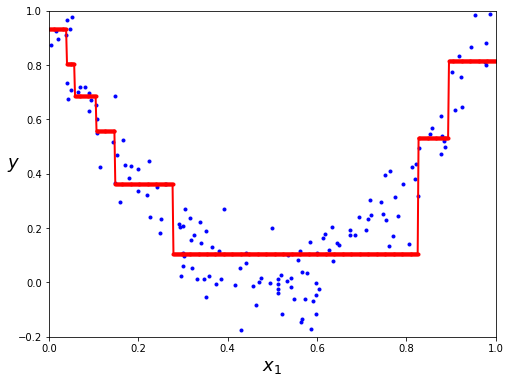

In [34]:
dt_reg = DecisionTreeRegressor(max_depth = 3)
dt_fit = dt_reg.fit(X, y)
plt.figure(figsize = (8,6))
plot_regression_predictions(dt_fit, X, y)

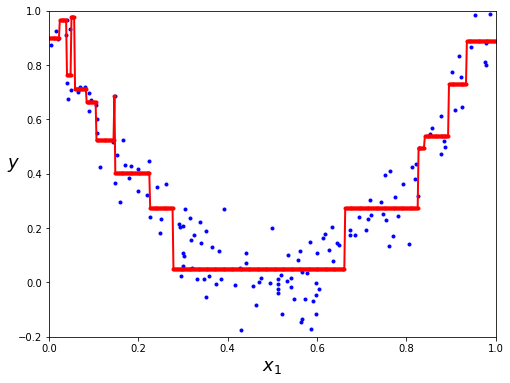

In [35]:
dt_reg = DecisionTreeRegressor(max_depth = 4)
dt_fit = dt_reg.fit(X, y)
plt.figure(figsize = (8,6))
plot_regression_predictions(dt_fit, X, y)

### Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 
3. Now fit a regression tree on the same dataset using the min_samples_leaf hyperparameter set to $10$. Plot the predicted value in all input space divisions and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

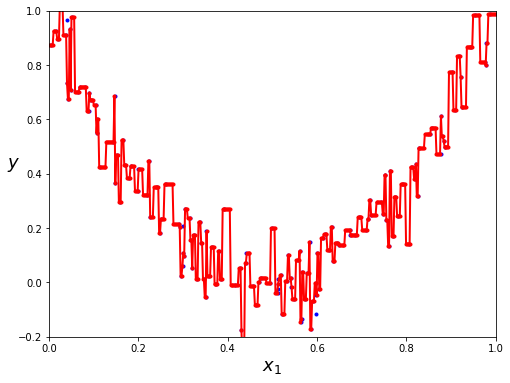

In [36]:
dt_reg = DecisionTreeRegressor()
dt_fit = dt_reg.fit(X, y)
plt.figure(figsize = (8,6))
plot_regression_predictions(dt_fit, X, y)

Yes, the regreesion tree highly overfits the data if no regularization is applied as can be seen from above.

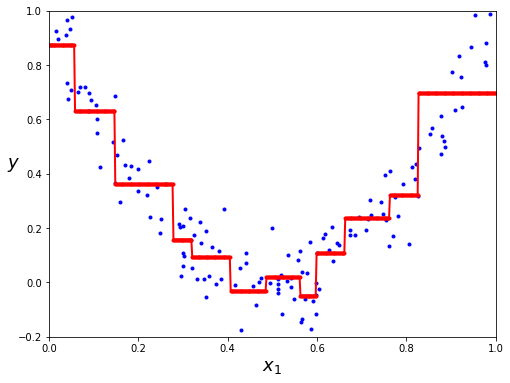

In [37]:
dt_reg = DecisionTreeRegressor(min_samples_leaf = 10)
dt_fit = dt_reg.fit(X, y)
plt.figure(figsize = (8,6))
plot_regression_predictions(dt_fit, X, y)

In (1) the model overfits the data and doen't generalize better to test data whereas in (3) the model doesn't overfit the data but seems to underfit the data but it will do a much better job in generalization than (1) model.

### Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.4$). 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $30$ for max_leaf_nodes and $2$ to $6$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
data = make_moons(n_samples = 10000, noise = 0.4)
X = data[0]
Y = data[1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41) 
parameters = {'min_samples_split':list(range(2, 30)) ,'max_leaf_nodes': list(range(2,6))}
dt_clf = DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'max_leaf_nodes': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
# optimal hyperparameters
print("The optimal hyperparameters obtained are: ")
print(clf.best_params_)

The optimal hyperparameters obtained are: 
{'max_leaf_nodes': 4, 'min_samples_split': 2}


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(max_leaf_nodes = 4, min_samples_split = 2)
dt_fit = dt_clf.fit(X_train, Y_train)
y_pred = dt_fit.predict(X_test)

# model performance
print("The misclassification error is :", np.sum(y_pred != Y_test))
print("The accuracy score obtained is :", accuracy_score(y_pred, Y_test))
print("The f1 score is :", f1_score(y_pred, Y_test))
print('The confusion matrix is: \n', confusion_matrix(y_pred, Y_test))
print('The classification report is : \n', classification_report(y_pred, Y_test))

The misclassification error is : 358
The accuracy score obtained is : 0.8568
The f1 score is : 0.8563402889245585
The confusion matrix is: 
 [[1075  182]
 [ 176 1067]]
The classification report is : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1257
           1       0.85      0.86      0.86      1243

   micro avg       0.86      0.86      0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



### Growing a random forest classifier

1. Continuing the previous exercise, generate $1,000$ subsets of the training set, each containing 100 instances selected randomly. You can use sklearn.model_selection.ShuffleSplit for this. Contrary to other cross-validation strategies, random splits in ShuffleSplit do not guarantee that all folds will be different.
2. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set created in ($2$) of the previous problem. How do you expect these decision trees to perform as compared to the first decision tree? Give reasons. Report the mean of accuracy scores of the 1000 trees.
3. For each test set instance, generate the predictions of the $1,000$ Decision Trees, and keep only the most frequent prediction. This gives you majority-vote predictions over the test set.
4. Evaluate these predictions on the test set and report the change in accuracy change as compared to that of the single decision tree.  

In [61]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits = 1000, train_size = 0.0125)
ypred_ls = []
sum_acc_score = 0
for train_index in rs.split(X_train):
    data = X_train[train_index[0]]
    Y_data = Y_train[train_index[0]]
    # decision tree classifier with the hyperparameters found above
    dt_clf = DecisionTreeClassifier(max_leaf_nodes = 4, min_samples_split = 2)
    dt_fit = dt_clf.fit(data, Y_data)
    y_pred = dt_fit.predict(X_test)
    ypred_ls.append(y_pred.tolist())
    sum_acc_score += accuracy_score(y_pred, Y_test)
    
print("The mean accuracy score of the 1000 trees is :", sum_acc_score/1000)

The mean accuracy score of the 1000 trees is : 0.8243104000000001


Each decision tree of the 1000 trees is expected to do poorly as compared to the first decision tree as the training dataset size is smaller which may result in overfit or underfit of some datasets as compared to the training set used in first decision tree.

In [60]:
from scipy import stats
ypred_arr = np.array(ypred_ls)
maj_vote = stats.mode(ypred_arr)[0].reshape(-1,1)

print("The accuracy score using majority vote approach is: ", accuracy_score(maj_vote, Y_test))

The accuracy score using majority vote approach is:  0.8568


In this case, the same accuracy score (using majority vote) is obtained as the first decision tree (4 - fine tuning a decision tree) but this approach does better than approach in (2). The majority vote classification has a benefit of reducing the overfit of the data and generalises much better to test dataset than the first decision tree.